# **Sales prediction (Simple Linear Regression)**

Problem Statement
Build a model which predicts sales.

In [ ]:
import warnings
warnings.filterwarnings('ignore')
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Read the Dataset
data=pd.read_csv('/content/shampoo_sales.csv')
data.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [ ]:
# convert the month to numeric data by adding extra column called (convert) to reolace each month to numbers begining from 0 to do operations on convert column instead of month
data['Convert']=pd.factorize(data.Month)[0]
data.head(10)


,Month,Sales,Convert
0,1-01,266.0,0
1,1-02,145.9,1
2,1-03,183.1,2
3,1-04,119.3,3
4,1-05,180.3,4
5,1-06,168.5,5
6,1-07,231.8,6
7,1-08,224.5,7
8,1-09,192.8,8
9,1-10,122.9,9


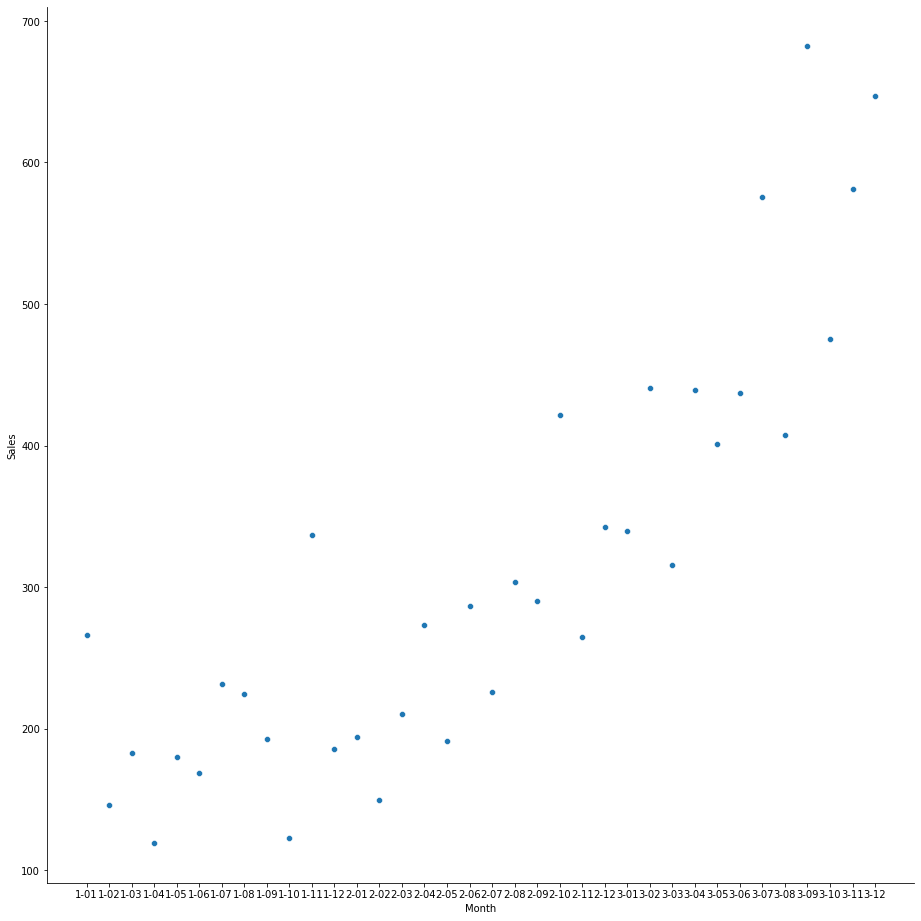

In [ ]:
# plot to see how sales are related with the month variable
sns.pairplot(data, x_vars=['Month'], y_vars='Sales', height=13, aspect=1, kind='scatter')
plt.show()

# Model Building

In [ ]:
# assign the feature variables we will use convert instead of month because month isn't numeric so we can't do operations on it
X = data['Convert']
y = data['Sales']

In [ ]:
# here we will split our variable into training and testing sets
from sklearn.model_selection import train_test_split
# It is a good practice to keep 70% of the data in your train dataset and the rest 30% in your test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
X_train.head()

22    22
6      6
13    13
9      9
26    26
Name: Convert, dtype: int64

In [ ]:
y_train.head()

22    264.5
6     231.8
13    149.5
9     122.9
26    315.9
Name: Sales, dtype: float64

# Building a Linear Model

In [ ]:
# import the statsmodel.api library which you'll perform the linear regression.
import statsmodels.api as sm

In [ ]:
# statsmodels library fits a line on the dataset which passes through the origin.
# but in order to have an intercept we will use add_constant
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS' -> Ordinary Least Squares is an attribute of statsmodel
lr = sm.OLS(y_train, X_train_sm).fit()

In [ ]:
# Print the parameters -> the intercept and the slope of the regression line fitted
lr.params

const      92.923985
Convert    11.754215
dtype: float64

### Sales = 92.9240 + 11.7542×Convert

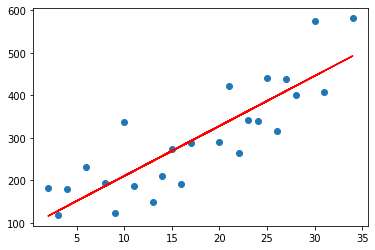

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 92.9240 + 11.7542*X_train, 'r')
plt.show()

# Model Evaluation

we will do some predictions on the test data

In [ ]:
# so add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)

In [ ]:
y_pred.head()

0      92.923985
19    316.254070
32    469.058864
35    504.321509
7     175.203490
dtype: float64

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.7003178002156695

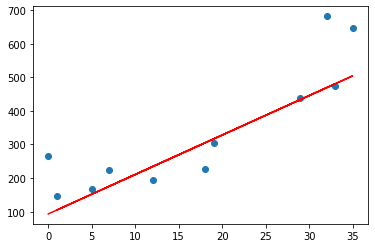

In [ ]:
# Visualizing the fit on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, 92.9240 + 11.7542*X_test, 'r')
plt.show()